In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('final_scout_not_dummy.csv')

In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0,63668.0,62111.0,14986.0,57000.0,16103.0
Type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Benzine
Gears,7.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Electrical side mirro...","Air conditioning,Power windows","Air conditioning,Armrest,Automatic climate con..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,CD player,Hands-free equipment,On-bo...","CD player,MP3,Radio",Radio,Radio


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [10]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

<AxesSubplot:>

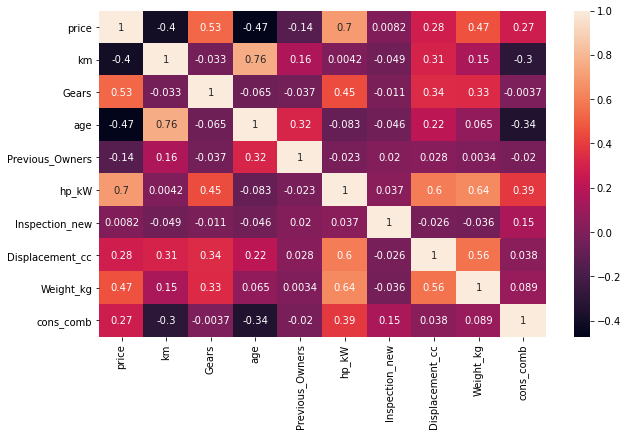

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)

In [12]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [13]:
df.make_model.value_counts()


Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [14]:
df = df[df.make_model !='Audi A2']

In [15]:
df.make_model.value_counts()


Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [16]:
df.body_type.value_counts()

Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [17]:
df = df[df.body_type !='Convertible']

In [18]:
df.body_type.value_counts()

Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           55
Coupe              25
Name: body_type, dtype: int64

In [19]:
df.vat.value_counts()

VAT deductible      15036
Price negotiable      870
Name: vat, dtype: int64

In [20]:
df.km.value_counts()

10.000000       1044
1647.362609      985
1.000000         367
5.000000         170
50.000000        148
                ... 
20719.000000       1
91910.000000       1
39860.000000       1
28084.000000       1
57889.000000       1
Name: km, Length: 6686, dtype: int64

In [21]:
df.km.describe()

count     15906.000000
mean      32096.180856
std       36984.785010
min           0.000000
25%        1914.250000
50%       20413.500000
75%       46921.000000
max      317000.000000
Name: km, dtype: float64

<AxesSubplot:xlabel='km', ylabel='Count'>

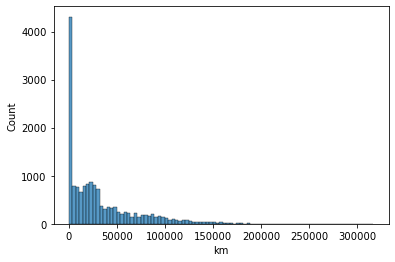

In [22]:
sns.histplot(df.km)

C:\Users\rusla\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km'>

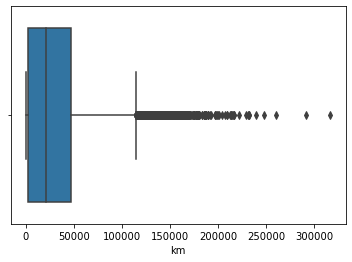

In [23]:
sns.boxplot(df.km)

In [24]:
df.Type.value_counts()

Used              11088
New                1649
Pre-registered     1364
Employee's car     1009
Demonstration       796
Name: Type, dtype: int64

In [25]:
df.Fuel.value_counts()

Benzine     8545
Diesel      7292
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [26]:
df = df[df.Fuel !='Electric' ]

In [27]:
df.Fuel.value_counts()

Benzine    8545
Diesel     7292
LPG/CNG      64
Name: Fuel, dtype: int64

In [28]:
df.Comfort_Convenience.value_counts()

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                             388
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                             187
Air conditioning,Armrest,Automatic

In [29]:
df.drop("Comfort_Convenience", axis=1,inplace=True)
df.drop("Entertainment_Media", axis=1,inplace=True)
df.drop("Extras", axis=1,inplace=True)
df.drop("Safety_Security", axis=1,inplace=True)

C:\Users\rusla\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')